In [1]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('coaster_db.csv')
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [6]:
df =df[['coaster_name','Location','Status','Manufacturer', 'year_introduced','latitude', 'longitude', 'Type_Main','opening_date_clean', 'speed_mph','height_ft', 'Inversions_clean', 'Gforce_clean']].copy()

In [8]:
df

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [7]:
df.isna().sum()

coaster_name            0
Location                0
Status                213
Manufacturer           59
year_introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [9]:
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Manufacturer        1028 non-null   object        
 4   year_introduced     1087 non-null   int64         
 5   latitude            812 non-null    float64       
 6   longitude           812 non-null    float64       
 7   Type_Main           1087 non-null   object        
 8   opening_date_clean  837 non-null    datetime64[ns]
 9   speed_mph           937 non-null    float64       
 10  height_ft           171 non-null    float64       
 11  Inversions_clean    1087 non-null   int64         
 12  Gforce_clean        362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), obje

In [11]:
df = df.loc[~df.duplicated(subset=['coaster_name','Location','opening_date_clean'])] \
    .reset_index(drop=True).copy()

In [12]:
df.describe()

,year_introduced,latitude,longitude,speed_mph,height_ft,Inversions_clean,Gforce_clean
count,990.000000,783.000000,783.000000,850.000000,159.000000,990.000000,324.000000
mean,1994.054545,38.375748,-41.591138,49.017647,103.994340,1.308081,3.815093
std,23.872027,15.549452,72.326633,16.847266,68.293609,2.026876,1.009229
min,1884.000000,-48.261700,-123.035700,5.000000,13.100000,0.000000,0.800000
25%,1988.000000,35.100350,-85.745650,37.300000,52.150000,0.000000,3.375000
50%,2000.000000,40.289700,-76.653500,50.000000,91.900000,0.000000,4.000000
75%,2009.000000,44.799750,2.863400,58.000000,133.850000,2.000000,4.500000
max,2022.000000,63.230900,153.426500,149.100000,377.300000,14.000000,12.000000


In [19]:
df['year_introduced'].value_counts().head(10)

1999    46
2000    45
1998    30
2001    29
2002    28
2008    27
2004    25
2011    24
2007    24
2013    23
Name: year_introduced, dtype: int64

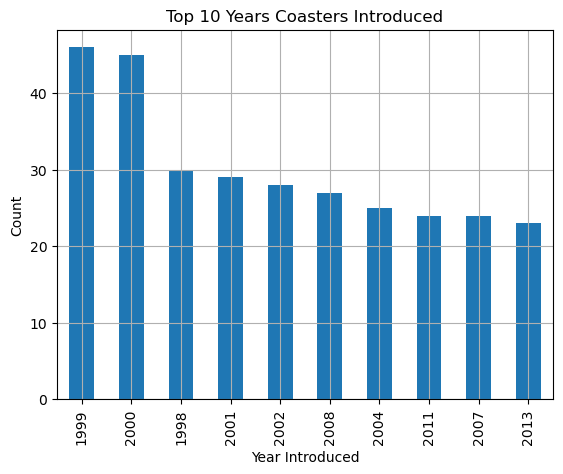

In [23]:
x = df['year_introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
x.set_xlabel('Year Introduced')
x.set_ylabel('Count')
plt.grid()

Text(0.5, 0, 'Speed (mph)')

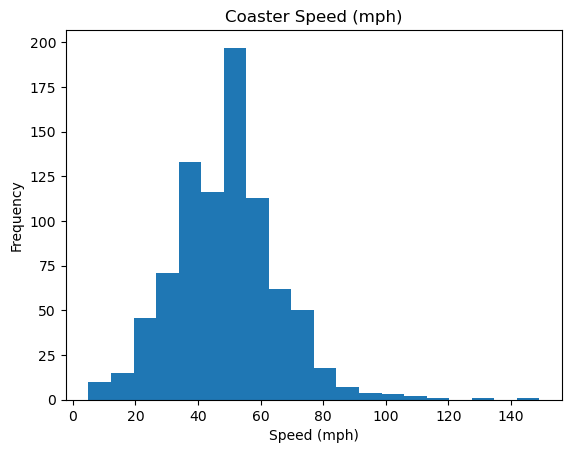

In [27]:
x = df['speed_mph'].plot(kind='hist',
                          bins=20,
                          title='Coaster Speed (mph)')
x.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

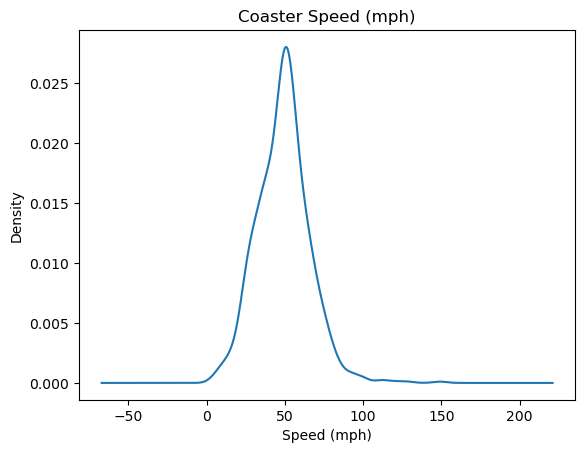

In [29]:
#anather ploting
x = df['speed_mph'].plot(kind='kde',
                          title='Coaster Speed (mph)')
x.set_xlabel('Speed (mph)')

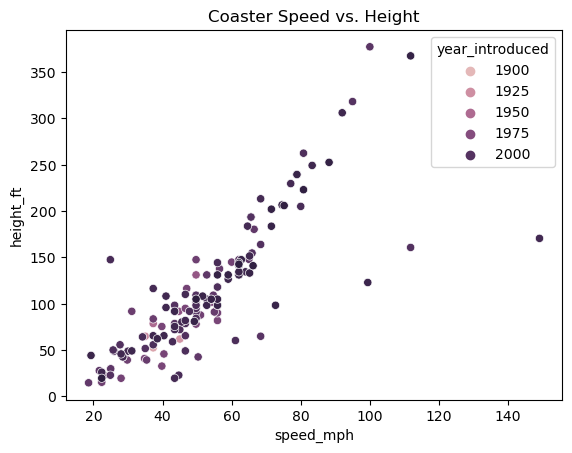

In [30]:
ax = sns.scatterplot(x='speed_mph',
                y='height_ft',
                hue='year_introduced',
                data=df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

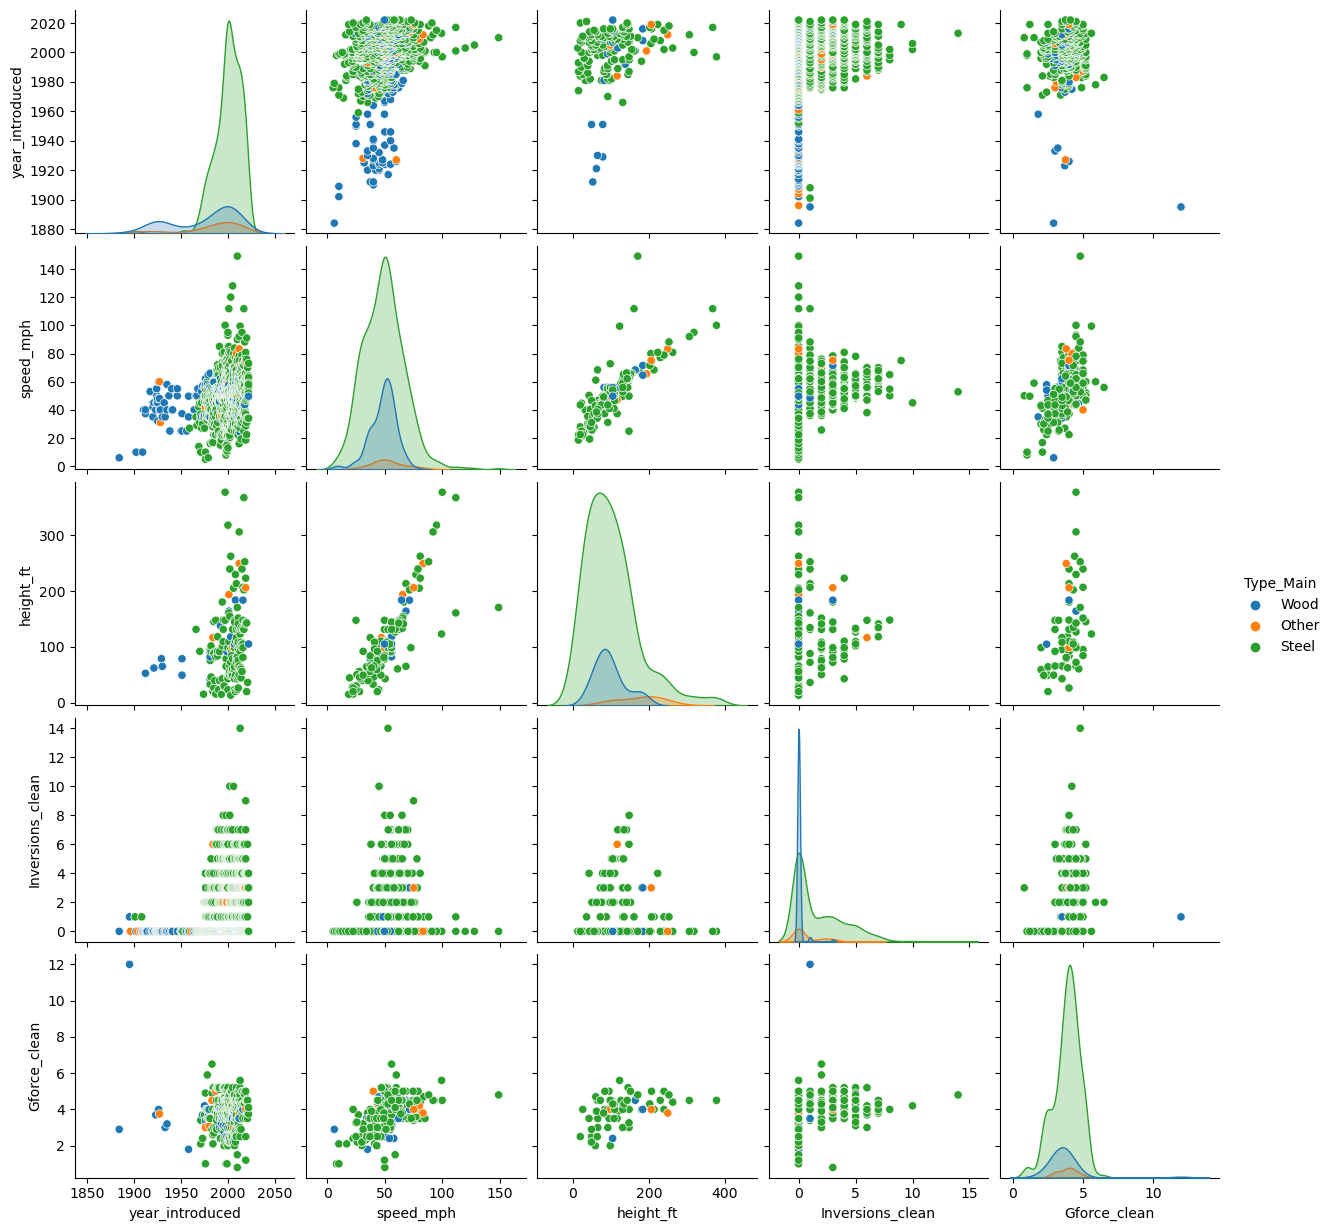

In [34]:
sns.pairplot(df,
             vars=['year_introduced','speed_mph',
                   'height_ft','Inversions_clean','Gforce_clean'],
            hue='Type_Main')
plt.show()

In [35]:
df.corr()

,year_introduced,latitude,longitude,speed_mph,height_ft,Inversions_clean,Gforce_clean
year_introduced,1.000000,-0.069354,0.178767,0.225991,0.249487,0.233701,-0.073403
latitude,-0.069354,1.000000,-0.297532,-0.056193,0.020147,-0.000506,0.055499
longitude,0.178767,-0.297532,1.000000,0.054283,0.129088,0.080824,0.017657
speed_mph,0.225991,-0.056193,0.054283,1.000000,0.823216,0.246593,0.503828
height_ft,0.249487,0.020147,0.129088,0.823216,1.000000,0.138286,0.480465
Inversions_clean,0.233701,-0.000506,0.080824,0.246593,0.138286,1.000000,0.339137
Gforce_clean,-0.073403,0.055499,0.017657,0.503828,0.480465,0.339137,1.000000


<AxesSubplot:>

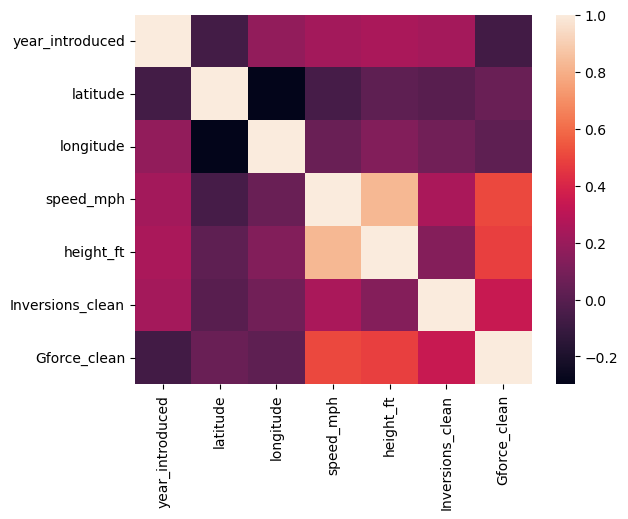

In [36]:
sns.heatmap(df.corr())

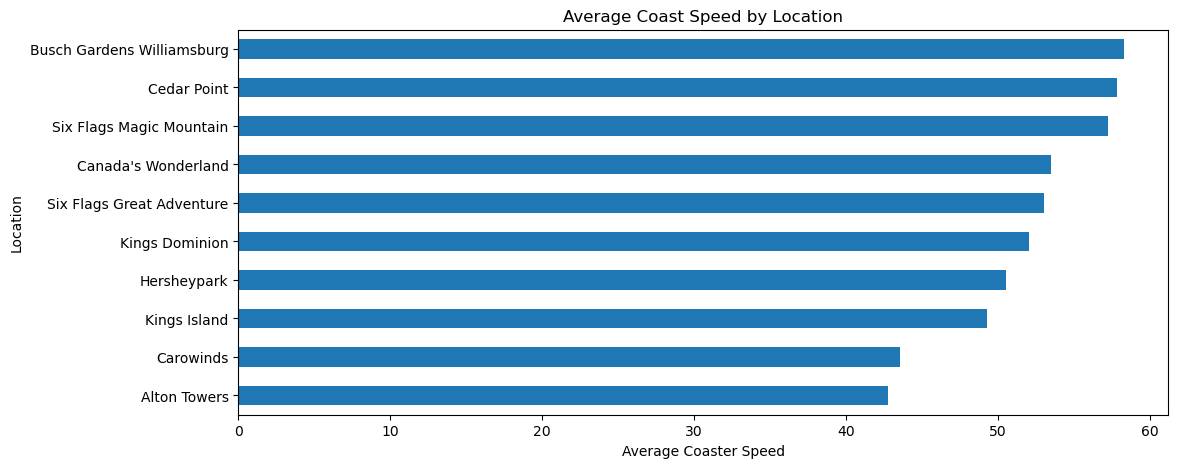

In [38]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()